In [2]:
%load_ext autoreload
%autoreload 2
#%matplotlib widget

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D


import numpy as np

import sys
sys.path.append("..")
from encoder_learning_benchmarks import common, datasets

In [4]:
# Distances between random points in higher dimensions
# avg_dists = np.zeros((1000, 4))
# for i in range(avg_dists.shape[0]):
#     for j in range(avg_dists.shape[1]):
#         n_dim = j + 1
#         ival = 1 / np.log2(1 + n_dim)
#         xs = np.random.uniform(-ival, ival, (1000, n_dim))
#         avg_dists[i, j] = np.mean(np.sqrt(np.sum(np.square(xs[None, :] - xs[:, None]), axis=-1)))

# fig, ax = plt.subplots()
# for j in range(avg_dists.shape[1]):
#     ax.hist(avg_dists[:, j], bins=10)

# Unbiased sampling in 3D with four clusters

In [5]:
dset = datasets.gaussian_clusters.manifest.ctor(n_classes=4, n_dim=3)
xs, ys = dset.sample(1000)
cs = np.argmax(ys, axis=1)

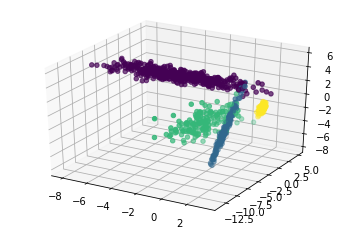

In [6]:
fig = plt.figure()
if xs.shape[1] >= 3:
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs[:, 0], xs[:, 1], xs[:, 2], c=cs)
elif xs.shape[1] >= 2:
    ax = fig.add_subplot(111)
    ax.scatter(xs[:, 0], xs[:, 1], c=cs)
else:
    ax = fig.add_subplot(111)
    ax.scatter(xs[:, 0], np.zeros(xs.shape[0]), c=cs)

# Experiments regarding biased sampling

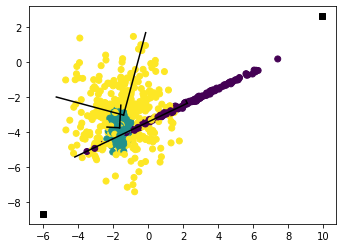

In [22]:
# Check the AABB calculation
dset = datasets.gaussian_clusters.manifest.ctor(n_classes=3, n_dim=2, biased=True)
xs, ys = dset.do_sample(1000, "validation")
cs = np.argmax(ys, axis=1)

fig, ax = plt.subplots()
ax.scatter(xs[:, 0], xs[:, 1], c=cs)
ax.scatter(dset.aabb[:, 0], dset.aabb[:, 1], marker='s', c='k')
ax.set_aspect(1)
for i in range(dset.n_classes):
    for j in range(dset.n_dim):
        vec = 3.1 * dset.scales[i] * dset.Qs[i] @ np.eye(dset.n_dim)[j] + dset.mus[i]
        ax.plot([dset.mus[i][0], vec[0]],
                [dset.mus[i][1], vec[1]], 'k-')

In [23]:
pnts = dset.hilbert_curve_pnts
ps = np.sum(dset.pdf(dset.hilbert_curve_pnts), axis=1)

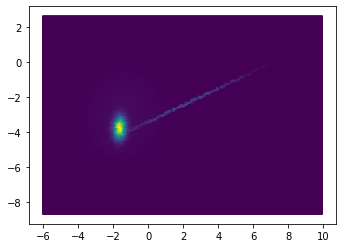

In [24]:
fig, ax = plt.subplots()
ax.scatter(pnts[:, 0], pnts[:, 1], c=ps, s=0.5)
ax.set_aspect(1)

(-8.699184468572009, 2.597814280827377)

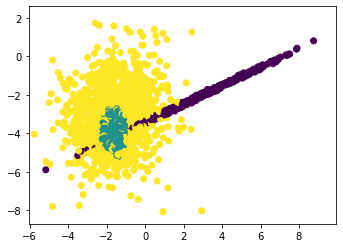

In [48]:
fig, ax = plt.subplots()
cmap = cm.get_cmap('viridis')

smpls, ys = dset._do_sample_biased(3000)
cs = np.argmax(ys, axis=1)
ax.scatter(smpls[:, 0], smpls[:, 1], c=cs)

ax.set_aspect(1)
ax.set_xlim(dset.aabb[0, 0], dset.aabb[1, 0])
ax.set_ylim(dset.aabb[0, 1], dset.aabb[1, 1])

# Some code for the Gumbel-max trick
See https://timvieira.github.io/blog/post/2014/07/31/gumbel-max-trick/
https://timvieira.github.io/blog/post/2019/09/16/algorithms-for-sampling-without-replacement/

In [ ]:
# Create a number of items. Assign a probability to each of them.
N = 10
items = np.arange(N)
ps = np.random.uniform(0, 1, N)
ps = ps / np.sum(ps)
ps_log = np.log(ps)

In [ ]:
n_smpls = 10000
X = ps_log[None, :] + np.random.gumbel(0, 1, (n_smpls, N))
sel = np.argmax(X, axis=1)
ps_rec = np.zeros(N)
for i in range(N):
    ps_rec[i] = np.sum(sel == i) / n_smpls

In [ ]:
fig, ax = plt.subplots()
ax.bar(items, ps / np.sum(ps), alpha=0.5)
ax.bar(items, ps_rec, alpha=0.5)

In [ ]:
ys = np.zeros(X.shape, np.bool)
ys[np.arange(len(sel)), sel] = True